# 1. 수입식품 EDA-Data split

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn
get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율(%)' : (df.isnull().sum()/len(df)).round(2),
                       '고유값 수(nunique)' : df.nunique(),
                      })
    for col in tf.index:
        tf.loc[col, '자료 내용(contents)'] = str(df[col].unique()[0:5])
        
    return tf

# 1. 데이터 확보

In [78]:
df = pd.read_pickle('../../pkl/가공식품-import-food-16-21.pkl')
df.shape

df = df[~df['접수번호'].duplicated()]
df.shape

df = df[(df['판정결과'] == '적합') | (df['판정결과'] == '부적합')]
df['판정결과'] = df['판정결과'].replace({'적합' : 0, '부적합': 1})
df.shape

df = df[(df['검사종류'].str.contains('정밀')) | (df['검사종류'].str.contains('무작위'))]
df.shape
df.head(3)

(714413, 65)

(423589, 65)

(418820, 65)

(393305, 65)

,접수번호,제품구분,접수일,신고시기,품목코드,품목명,제품명,제품명(한글),용도코드,용도명,...,부족합조치예정일,통관진행상태,검사종류 대분류,검사종류 대분류명,최종결과 일련번호,검사코드,선별,검사종류,비고,최종결과일련번호
1,201600214072,가공식품,2016-05-31 09:50:09,본신고,C0130030000000000000,서류가공품,CAVENDISH STRAIGHT CUT,스트레이트 컷,1,판매용,...,NaN,NaN,4.0,무작위표본,64010.0,450,NaN,무작위(자체계획에 의한 검사),NaN,NaN
2,201600217150,가공식품,2016-06-02 09:28:22,본신고,C0127030000000000000,청주,GANBARE TOUCHAN PACK(900ML),간바래 오도상팩(900미리리터),1,판매용,...,NaN,NaN,3.0,정밀,64022.0,370,NaN,정밀(본부 지시에 의한 검사),NaN,NaN
3,201600231480,가공식품,2016-06-14 11:35:10,본신고,C0121020000000000000,소스류,HOT PEPPER SAUCE,정제뉴러우 유라죠우,1,판매용,...,NaN,NaN,4.0,무작위표본,45355.0,411,NaN,무작위(검사강화 국가별품목),NaN,NaN


## fix the time duration 

In [79]:
df = df[df['접수일'] >= '2016-01-01']
df['접수일'].max()
df['접수일'].min()

'2021-09-29 12:11:46'

'2016-01-04 08:40:53'

In [80]:
df['접수일'] = df['접수일'].apply(lambda x : x.split(' ')[0])

In [81]:
df.columns
df['판정결과'].value_counts()

df['판정결과'].value_counts(normalize=True)

Index(['접수번호', '제품구분', '접수일', '신고시기', '품목코드', '품목명', '제품명', '제품명(한글)', '용도코드',
       '용도명', '선적일자', '제조국(원산지)코드', '제조국(원산지)', '수출국코드', '수출국', '순중량(Kg)',
       '과세가격', '과세가격($/Kg)', '유기식품 여부', '식품조사처리 여부', '영유아섭취대상', '주문자상표부착',
       '고열량.저영양', '유전자변형식품', '서류검사또는환경검사생략대상여부', '수입화주 상호', '대행업자 사업자등록번호',
       '해외제조업소 등록번호', '해외제조업소명', '해외제조업소 지역', '검사명령제도 해당여부', '국내도착항 코드',
       '국내도착항명', '입항일', '선적항명', '선적일', '반입일자', '신속검사대상', '가온보존대상', '진균수시험대상',
       '방사선조사식품', '판정조치 구분코드', '판정결과', '행정조치사유코드1', '행정조치사유1', '행정조치사유코드2',
       '행정조치사유2', '통보내용', '부적합 최종처리 결과코드', '부적합최종처리결과', '부적합 최종처리 결과 일시',
       '부적합 최종처리 근거 설명', '송문수취일', '등기번호', '부적합조치계획', '부족합조치예정일', '통관진행상태',
       '검사종류 대분류', '검사종류 대분류명', '최종결과 일련번호', '검사코드', '선별', '검사종류', '비고',
       '최종결과일련번호'],
      dtype='object')

0    388555
1      4004
Name: 판정결과, dtype: int64

0    0.9898
1    0.0102
Name: 판정결과, dtype: float64

In [82]:
df['접수일'] = pd.to_datetime(df['접수일'])

# 년간 수입건수 및 총 건수

In [176]:
df.set_index('접수일').resample('y')['판정결과'].count()
print('총 건수')
df.set_index('접수일').resample('y')['판정결과'].count().sum()

접수일
2016-12-31    69263
2017-12-31    73120
2018-12-31    78414
2019-12-31    74148
2020-12-31    56539
2021-12-31    41075
Freq: A-DEC, Name: 판정결과, dtype: int64

총 건수


392559

In [180]:
df.set_index('접수일').resample('y')['판정결과'].mean()*100
df.set_index('접수일').resample('y')['판정결과'].mean().mean()*100

접수일
2016-12-31    1.055398
2017-12-31    0.962801
2018-12-31    1.057209
2019-12-31    0.942709
2020-12-31    0.923257
2021-12-31    1.263542
Freq: A-DEC, Name: 판정결과, dtype: float64

1.034152596653257

In [84]:
summary(df)[0:30]

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.00,392559,['201600214072' '201600217150' '201600231480' ...
제품구분,object,0,0.00,1,['가공식품']
접수일,datetime64[ns],0,0.00,1431,['2016-05-31T00:00:00.000000000' '2016-06-02T0...
신고시기,object,0,0.00,2,['본신고' '사전신고']
품목코드,object,0,0.00,441,['C0130030000000000000' 'C0127030000000000000'...
품목명,object,0,0.00,316,['서류가공품' '청주' '소스류' '과실주' '만두류']
제품명,object,2,0.00,134000,['CAVENDISH STRAIGHT CUT' 'GANBARE TOUCHAN PAC...
제품명(한글),object,0,0.00,151542,['스트레이트 컷' '간바래 오도상팩(900미리리터)' '정제뉴러우 유라죠우' '미...
용도코드,object,0,0.00,9,['1' 'J' '4' 'H' '7']
용도명,object,0,0.00,9,['판매용' '자사제품제조용' '외화획득용 원료' '판매용(식용향료)' '반송품(기...


In [85]:
summary(df)[30:60]

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
검사명령제도 해당여부,object,0,0.00,2,['아니오' '예']
국내도착항 코드,object,18485,0.05,25,['KRPUS' 'KRINC' nan 'ICN' 'KRKAN']
국내도착항명,object,18485,0.05,24,['Pusan' 'Inchon' nan '인천공항' 'Kwangyang']
입항일,object,0,0.00,2252,['2016-05-19' '2016-05-22' '2016-06-05' '2016-...
선적항명,object,493,0.00,2571,"['Halifax' 'Niigata, Niigata' 'Shanghai' 'Fos ..."
선적일,object,491,0.00,2364,['2016-04-11' '2016-05-19' '2016-06-02' '2016-...
반입일자,object,0,0.00,2352,['2016-05-30' '2016-05-26' '2016-06-13' '2016-...
신속검사대상,object,0,0.00,2,['N' 'Y']
가온보존대상,object,0,0.00,2,['N' 'Y']
진균수시험대상,object,0,0.00,2,['N' 'Y']


In [86]:
summary(df)[60:100]

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
검사코드,object,0,0.00,38,['450' '370' '411' '410' '310']
선별,object,312229,0.80,2,[nan '자동' '수동']
검사종류,object,0,0.00,38,['무작위(자체계획에 의한 검사)' '정밀(본부 지시에 의한 검사)' '무작위(검사...
비고,object,357661,0.91,11699,"[nan '방사능(일본, 모든제품, 요오드, 세슘) -1' '위해도 점수 : 0.4..."
최종결과일련번호,float64,28657,0.07,281527,[ nan 10006037. 5197121. 3316907. 1724...


In [87]:
df['순중량(Kg)_log'] = np.log(df['순중량(Kg)'])
df['과세가격_log'] = np.log(df['과세가격'])
df['과세가격($/Kg)'] = np.log(df['과세가격($/Kg)'])

<Figure size 1008x432 with 0 Axes>

<AxesSubplot:xlabel='제품구분', ylabel='순중량(Kg)_log'>

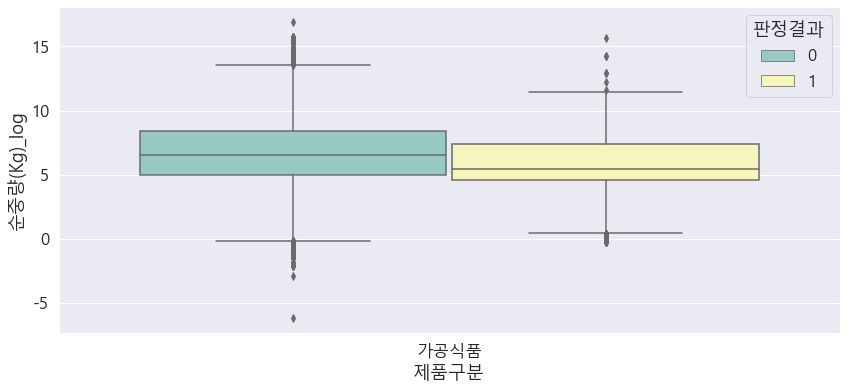

In [88]:
sns.set(font_scale=1.5)
plt.rcParams['font.family']='Malgun Gothic' #한글 폰트 사용
plt.figure(figsize=(14,6))
sns.boxplot(x ='제품구분', y = "순중량(Kg)_log",  hue = "판정결과", palette = "Set3", data = df)

### 특정 수치형 변수(col2)의 범주 유형별(col1) 그래프

<AxesSubplot:>

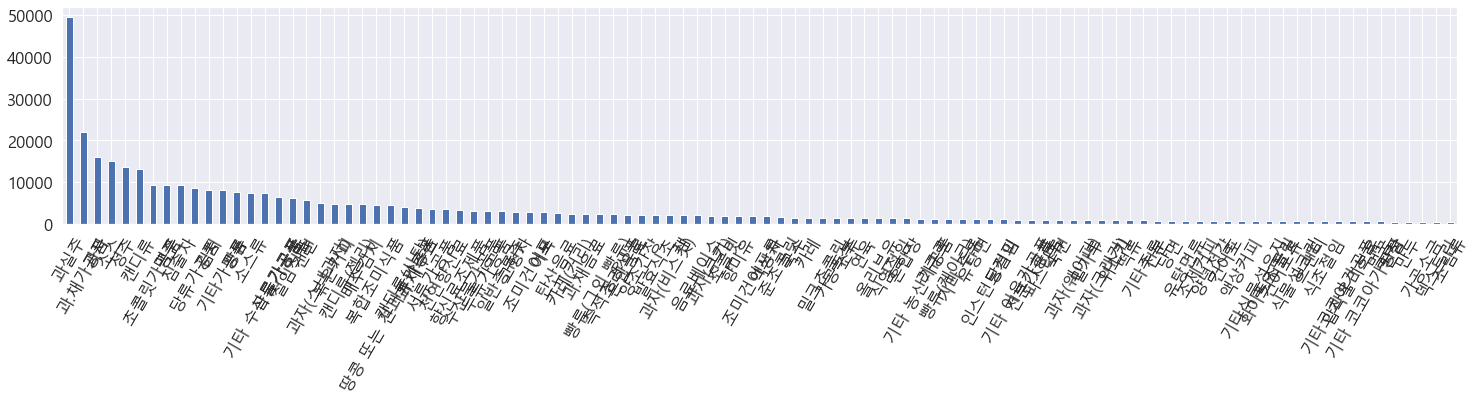

In [89]:
df['품목명'].value_counts().nlargest(100).plot(kind='bar', rot=60, figsize=(25,4))

<AxesSubplot:>

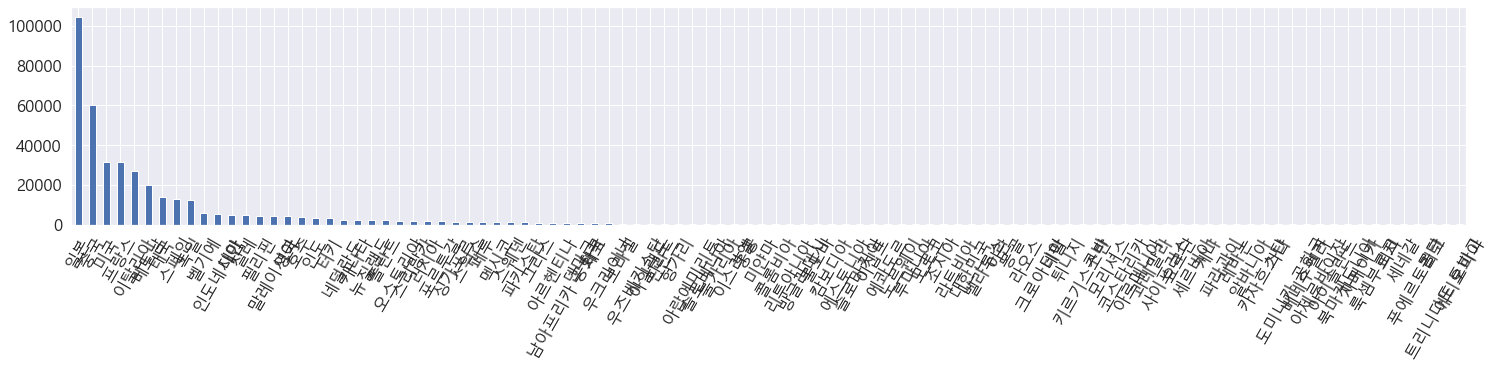

In [90]:
df['제조국(원산지)'].value_counts().nlargest(100).plot(kind='bar', rot=60, figsize=(25,4))

In [91]:
df.columns

Index(['접수번호', '제품구분', '접수일', '신고시기', '품목코드', '품목명', '제품명', '제품명(한글)', '용도코드',
       '용도명', '선적일자', '제조국(원산지)코드', '제조국(원산지)', '수출국코드', '수출국', '순중량(Kg)',
       '과세가격', '과세가격($/Kg)', '유기식품 여부', '식품조사처리 여부', '영유아섭취대상', '주문자상표부착',
       '고열량.저영양', '유전자변형식품', '서류검사또는환경검사생략대상여부', '수입화주 상호', '대행업자 사업자등록번호',
       '해외제조업소 등록번호', '해외제조업소명', '해외제조업소 지역', '검사명령제도 해당여부', '국내도착항 코드',
       '국내도착항명', '입항일', '선적항명', '선적일', '반입일자', '신속검사대상', '가온보존대상', '진균수시험대상',
       '방사선조사식품', '판정조치 구분코드', '판정결과', '행정조치사유코드1', '행정조치사유1', '행정조치사유코드2',
       '행정조치사유2', '통보내용', '부적합 최종처리 결과코드', '부적합최종처리결과', '부적합 최종처리 결과 일시',
       '부적합 최종처리 근거 설명', '송문수취일', '등기번호', '부적합조치계획', '부족합조치예정일', '통관진행상태',
       '검사종류 대분류', '검사종류 대분류명', '최종결과 일련번호', '검사코드', '선별', '검사종류', '비고',
       '최종결과일련번호', '순중량(Kg)_log', '과세가격_log'],
      dtype='object')

## <font color='red'> 접수일과 행정조치 사유 컬럼 추가 
- 시각화를 위해

In [73]:
goog = df[['접수일', '품목명', '용도명', '제조국(원산지)', '과세가격($/Kg)', '유기식품 여부', '영유아섭취대상', 
           '주문자상표부착', '유전자변형식품', '가온보존대상', '진균수시험대상', '방사선조사식품', '판정결과', 
           '순중량(Kg)_log', '과세가격_log', '행정조치사유1']]
goog.head()

,접수일,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log,행정조치사유1
1,2016-05-31,서류가공품,판매용,캐나다,0.213497,아니오,아니오,아니오,해당없음,N,N,N,0,9.875088,10.088854,NaN
2,2016-06-02,청주,판매용,일본,1.290884,아니오,아니오,아니오,해당없음,N,N,N,0,10.162770,11.453674,NaN
3,2016-06-14,소스류,판매용,중국,0.695145,아니오,아니오,아니오,표시하지않음,N,N,N,0,7.321189,8.016318,NaN
4,2016-02-18,과실주,판매용,프랑스,1.746239,아니오,아니오,아니오,해당없음,N,N,N,0,5.192957,6.939254,NaN
5,2016-02-16,만두류,판매용,중국,1.512927,아니오,아니오,아니오,해당없음,N,N,N,0,7.677864,9.190852,NaN


In [114]:
data = df[['접수일', '판정결과','품목명', '행정조치사유1']].set_index('접수일')
data

,판정결과,품목명,행정조치사유1
접수일,,,
2016-05-31,0,서류가공품,NaN
2016-06-02,0,청주,NaN
2016-06-14,0,소스류,NaN
2016-02-18,0,과실주,NaN
2016-02-16,0,만두류,NaN
...,...,...,...
2021-08-11,0,과실주,NaN
2021-04-13,0,초콜릿가공품,NaN
2021-06-04,0,과실주,NaN


<AxesSubplot:xlabel='접수일'>

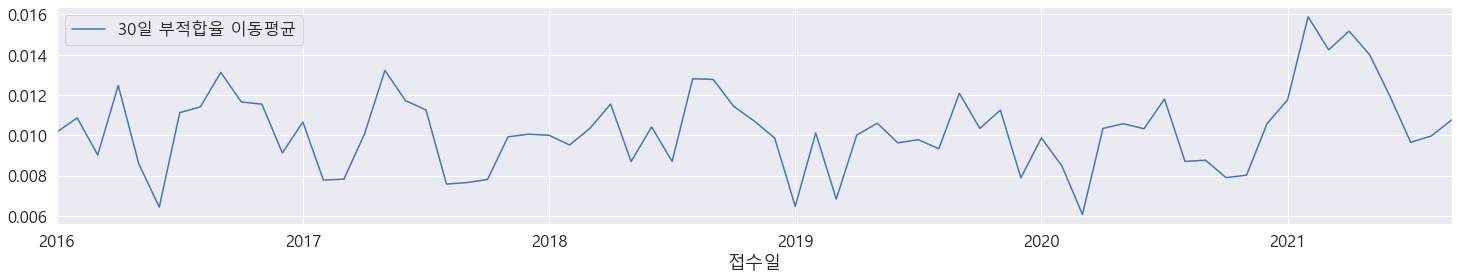

In [115]:
data.drop(['품목명', '행정조치사유1'], axis=1).resample('m').mean().plot(figsize=(25,4))
plt.legend(['30일 부적합율 이동평균'], loc='upper left')
img = plt.legend(['30일 부적합율 이동평균'], loc='upper left')
fig = img.get_figure()

import os
os.makedirs('../../image', exist_ok=True)
fig.savefig('../../image/30일 부적합율 이동평균선.png')

In [117]:
data['건수'] = 1
data = data.dropna()

In [128]:
data_pi = pd.pivot_table(data, index = '품목명', columns='행정조치사유1', values = '건수', aggfunc='sum').fillna(0)
data_pi
data_pi.max()

행정조치사유1
[공통-반려] 기타                             4.0
[공통-부적합] 곰팡이독소 허용기준 위반                 7.0
[공통-부적합] 기타                            3.0
[공통-부적합] 농약잔류허용기준 위반                  66.0
[공통-부적합] 동물용의약품 잔류허용기준 위반              3.0
[공통-부적합] 미생물(세균수, 대장균 등)             101.0
[공통-부적합] 방사능 잠정 허용기준 위반                2.0
[공통-부적합] 보존 및 유통기준 위반                  2.0
[공통-부적합] 부적합 제품과 동일 제조일자(또는 유통기한)      2.0
[공통-부적합] 성상(파손 포함)                     1.0
[공통-부적합] 수입신고위반(사실과 다름)                6.0
[공통-부적합] 식품 등 개별 기준 및 규격 위반           74.0
[공통-부적합] 식품 등 일반의 기준 및 규격 위반          95.0
[공통-부적합] 식품조사처리 기준 위반                  1.0
[공통-부적합] 식품첨가물 사용기준 위반                62.0
[공통-부적합] 원료 등의 구비요건 위반                 3.0
[공통-부적합] 유통기한 경과                       2.0
[공통-부적합] 유통기한 변조                       4.0
[공통-부적합] 유해물질 검출                      16.0
[공통-부적합] 이물혼입                         41.0
[공통-부적합] 제조·가공기준 위반                    4.0
[공통-부적합] 제조일자 변조                       1.0
[공통-부적합] 허용외 식품원료                      2.0
[공통

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [130]:
print(scaler.fit(data_pi))

MinMaxScaler()


In [153]:
scaler.transform(data_pi).shape

(168, 28)

In [154]:
len(data.품목명.tolist())

4008

In [190]:
a = data_pi.copy()

b= scaler.transform(data_pi)

In [191]:
a.loc[:, :] = b

In [192]:
a

행정조치사유1,[공통-반려] 기타,[공통-부적합] 곰팡이독소 허용기준 위반,[공통-부적합] 기타,[공통-부적합] 농약잔류허용기준 위반,[공통-부적합] 동물용의약품 잔류허용기준 위반,"[공통-부적합] 미생물(세균수, 대장균 등)",[공통-부적합] 방사능 잠정 허용기준 위반,[공통-부적합] 보존 및 유통기준 위반,[공통-부적합] 부적합 제품과 동일 제조일자(또는 유통기한),[공통-부적합] 성상(파손 포함),...,[공통-부적합] 유해물질 검출,[공통-부적합] 이물혼입,[공통-부적합] 제조·가공기준 위반,[공통-부적합] 제조일자 변조,[공통-부적합] 허용외 식품원료,[공통-부적합] 허용외 식품첨가물,[기구용기포장-부적합] 용출규격 위반,[기구용기포장-부적합] 재질규격 위반,[식품첨가물-부적합] 기타 기준규격 위반,[식품첨가물-부적합] 식품첨가물 함량기준 위반
품목명,,,,,,,,,,,,,,,,,,,,,
가공두부,0.0,0.0,0.0,0.0,0.0,0.009901,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0.0
가공소금,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
가공유지,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
가공화분,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
건면,0.0,0.0,0.0,0.0,0.0,0.019802,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.318182,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
환자용식품,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
효모음료,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
효소분해간장,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [161]:
#print(scaler.data_max_)
scaler.transform(data_pi).max()
data = pd.DataFrame(scaler.transform(data_pi),
            index = data_pi.index.tolist(),
            columns = data_pi.columns.tolist()
            )

1.0

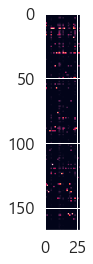

In [164]:
plt.imshow(data)

In [137]:
#data_pi.values = scaler.transform(data_pi)
data_pi

행정조치사유1,[공통-반려] 기타,[공통-부적합] 곰팡이독소 허용기준 위반,[공통-부적합] 기타,[공통-부적합] 농약잔류허용기준 위반,[공통-부적합] 동물용의약품 잔류허용기준 위반,"[공통-부적합] 미생물(세균수, 대장균 등)",[공통-부적합] 방사능 잠정 허용기준 위반,[공통-부적합] 보존 및 유통기준 위반,[공통-부적합] 부적합 제품과 동일 제조일자(또는 유통기한),[공통-부적합] 성상(파손 포함),...,[공통-부적합] 유해물질 검출,[공통-부적합] 이물혼입,[공통-부적합] 제조·가공기준 위반,[공통-부적합] 제조일자 변조,[공통-부적합] 허용외 식품원료,[공통-부적합] 허용외 식품첨가물,[기구용기포장-부적합] 용출규격 위반,[기구용기포장-부적합] 재질규격 위반,[식품첨가물-부적합] 기타 기준규격 위반,[식품첨가물-부적합] 식품첨가물 함량기준 위반
품목명,,,,,,,,,,,,,,,,,,,,,
가공두부,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
가공소금,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가공유지,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가공화분,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
건면,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
환자용식품,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
효모음료,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
효소분해간장,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
data_pi.head()

행정조치사유1,[공통-반려] 기타,[공통-부적합] 곰팡이독소 허용기준 위반,[공통-부적합] 기타,[공통-부적합] 농약잔류허용기준 위반,[공통-부적합] 동물용의약품 잔류허용기준 위반,"[공통-부적합] 미생물(세균수, 대장균 등)",[공통-부적합] 방사능 잠정 허용기준 위반,[공통-부적합] 보존 및 유통기준 위반,[공통-부적합] 부적합 제품과 동일 제조일자(또는 유통기한),[공통-부적합] 성상(파손 포함),...,[공통-부적합] 유해물질 검출,[공통-부적합] 이물혼입,[공통-부적합] 제조·가공기준 위반,[공통-부적합] 제조일자 변조,[공통-부적합] 허용외 식품원료,[공통-부적합] 허용외 식품첨가물,[기구용기포장-부적합] 용출규격 위반,[기구용기포장-부적합] 재질규격 위반,[식품첨가물-부적합] 기타 기준규격 위반,[식품첨가물-부적합] 식품첨가물 함량기준 위반
품목명,,,,,,,,,,,,,,,,,,,,,
가공두부,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
가공소금,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가공유지,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
가공화분,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
건면,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0


(array([  0.5,   4.5,   8.5,  12.5,  16.5,  20.5,  24.5,  28.5,  32.5,
         36.5,  40.5,  44.5,  48.5,  52.5,  56.5,  60.5,  64.5,  68.5,
         72.5,  76.5,  80.5,  84.5,  88.5,  92.5,  96.5, 100.5, 104.5,
        108.5, 112.5, 116.5, 120.5, 124.5, 128.5, 132.5, 136.5, 140.5,
        144.5, 148.5, 152.5, 156.5, 160.5, 164.5]),
 [Text(0.5, 0, '가공두부'),
  Text(4.5, 0, '건면'),
  Text(8.5, 0, '고춧가루'),
  Text(12.5, 0, '과.채가공품'),
  Text(16.5, 0, '과실주'),
  Text(20.5, 0, '과자(웨이퍼)'),
  Text(24.5, 0, '기타 농산가공품'),
  Text(28.5, 0, '기타 어육가공품'),
  Text(32.5, 0, '기타가공품(식용번데기가공품)'),
  Text(36.5, 0, '기타면류(만두피)'),
  Text(40.5, 0, '기타식물성유지'),
  Text(44.5, 0, '기타영.유아식'),
  Text(48.5, 0, '김치'),
  Text(52.5, 0, '당시럽류'),
  Text(56.5, 0, '두부'),
  Text(60.5, 0, '로열젤리'),
  Text(64.5, 0, '마요네즈'),
  Text(68.5, 0, '맥주'),
  Text(72.5, 0, '발효식초'),
  Text(76.5, 0, '복합조미식품'),
  Text(80.5, 0, '빙과류'),
  Text(84.5, 0, '빵류(케이크)'),
  Text(88.5, 0, '서류가공품'),
  Text(92.5, 0, '숙면'),
  Text(96.5, 0, '식초절임'),
  Text(100.5,

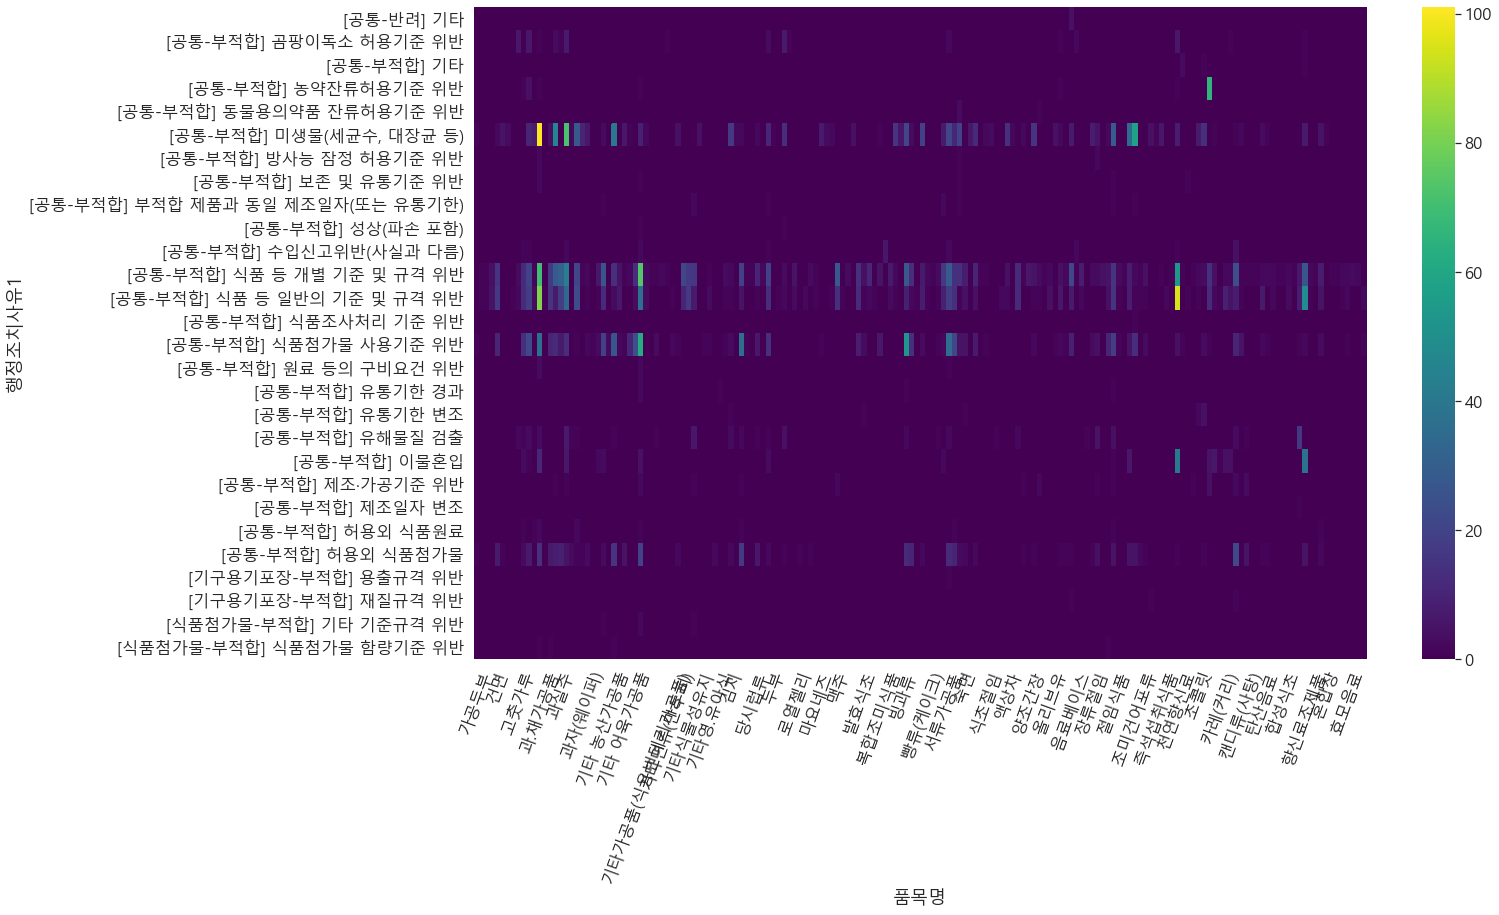

In [175]:
fig, ax = plt.subplots(figsize=(20,12))
img= sns.heatmap(data_pi.T, cmap='viridis')
plt.xticks(rotation=70) 

fig = img.get_figure()
fig.savefig('../../image/품목-부적합사유01.png')

접수일
2015-12-10 09:29:56    NaN
2015-12-15 09:56:51    NaN
2015-12-15 10:00:41    NaN
2015-12-18 10:00:45    NaN
2015-12-18 10:05:45    NaN
                      ... 
2021-09-29 11:38:34    0.0
2021-09-29 11:56:04    0.0
2021-09-29 11:57:07    0.0
2021-09-29 12:00:45    0.0
2021-09-29 12:11:46    0.0
Name: 판정결과, Length: 393305, dtype: float64

<AxesSubplot:xlabel='접수일'>

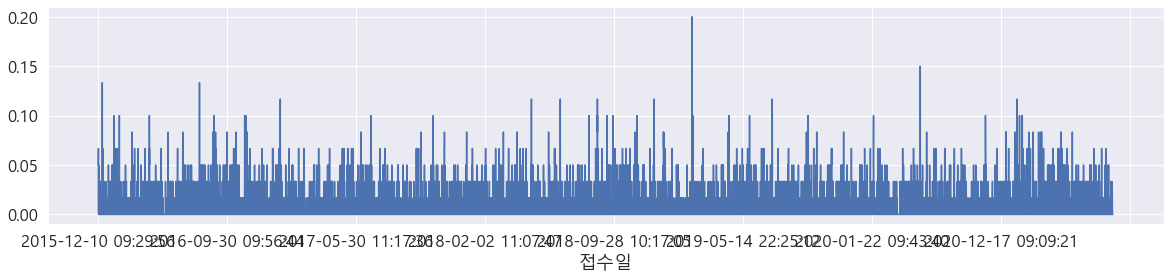

In [25]:
df.sort_values('접수일').set_index('접수일')['판정결과'].rolling(window=60).mean()
data = df.sort_values('접수일').set_index('접수일')['판정결과'].rolling(window=60).mean().plot(figsize=(20,4))
data
#plt.scatter(df['방문횟수'],df['클릭수'],c=df['구매']figsize=(25,4))30일 부적합율 이동평균선

AttributeError: 'PathCollection' object has no property 'figsize'

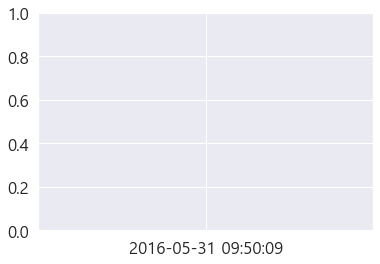

In [23]:
plt.scatter(data.index, data.values, figsize=(25,4))

In [26]:
data = df[['접수일', '판정결과']]

In [8]:
df = df[['품목명', '용도명', '제조국(원산지)', '과세가격($/Kg)', '유기식품 여부', '영유아섭취대상', 
           '주문자상표부착', '유전자변형식품', '가온보존대상', '진균수시험대상', '방사선조사식품', '판정결과', 
           '순중량(Kg)_log', '과세가격_log']]
df.head()
summary(df)

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log
1,서류가공품,판매용,캐나다,1.238,아니오,아니오,아니오,해당없음,N,N,N,0,9.875088,10.088854
2,청주,판매용,일본,3.636,아니오,아니오,아니오,해당없음,N,N,N,0,10.162770,11.453674
3,소스류,판매용,중국,2.004,아니오,아니오,아니오,표시하지않음,N,N,N,0,7.321189,8.016318
4,과실주,판매용,프랑스,5.733,아니오,아니오,아니오,해당없음,N,N,N,0,5.192957,6.939254
5,만두류,판매용,중국,4.540,아니오,아니오,아니오,해당없음,N,N,N,0,7.677864,9.190852


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
품목명,object,0,0.0,316,['서류가공품' '청주' '소스류' '과실주' '만두류']
용도명,object,0,0.0,9,['판매용' '자사제품제조용' '외화획득용 원료' '판매용(식용향료)' '반송품(기...
제조국(원산지),object,0,0.0,138,['캐나다' '일본' '중국' '프랑스' '독일']
과세가격($/Kg),float64,0,0.0,50604,[1.238 3.636 2.004 5.733 4.54 ]
유기식품 여부,object,0,0.0,2,['아니오' '예']
영유아섭취대상,object,0,0.0,2,['아니오' '예']
주문자상표부착,object,0,0.0,2,['아니오' '예']
유전자변형식품,object,0,0.0,3,['해당없음' '표시하지않음' '표시함']
가온보존대상,object,0,0.0,2,['N' 'Y']
진균수시험대상,object,0,0.0,2,['N' 'Y']


In [36]:
data= df.copy()

## <font color ='blue'> 데이터 전처리(데이터 줄이기)

- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
- https://www.kaggle.com/shakedzy/alone-in-the-woods-using-theil-s-u-for-survival
- https://pydataset.readthedocs.io/en/latest/_modules/dataset/correlations.html

In [37]:
import math
import scipy.stats as ss
from collections import Counter

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [38]:
columns = data.columns
theilu = pd.DataFrame(index=['판정결과'], columns= columns)


def cat_corr (df):
    
    for j in range(0,len(columns)):
        u = theil_u(df['판정결과'].tolist(),df[columns[j]].tolist())
        theilu.loc[:,columns[j]] = u
    theilu.fillna(value=np.nan,inplace=True)

    plt.figure(figsize=(30,2))
    sns.heatmap(theilu,annot=True,fmt='.2f')

    plt.show()

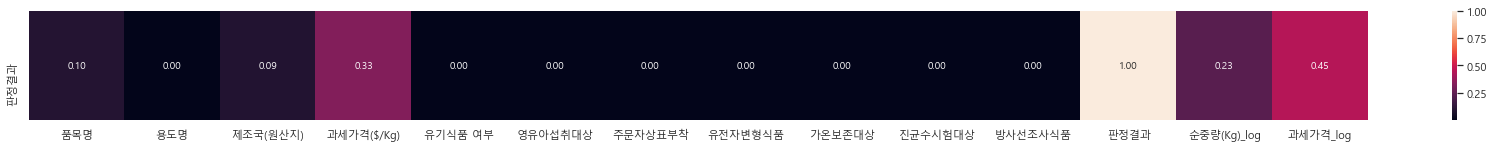

In [39]:
cat_corr(data)

## step1. 과세가격
### 과거 부적합 결과의 최대값과 최소값의 안에 있는 데이터만 확인

array([<AxesSubplot:title={'center':'과세가격_log'}, xlabel='판정결과'>,
       <AxesSubplot:title={'center':'순중량(Kg)_log'}, xlabel='판정결과'>],
      dtype=object)

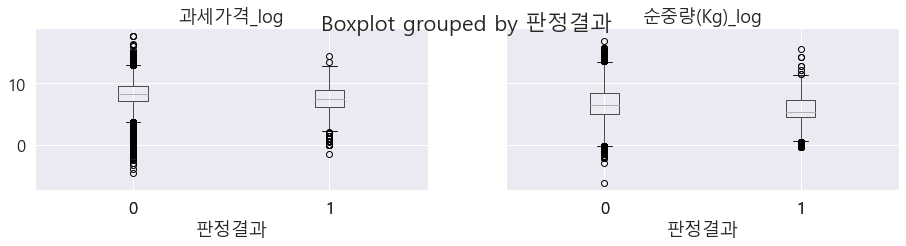

In [15]:
data.boxplot(column=['과세가격_log', '순중량(Kg)_log'], by='판정결과', figsize=(15,3))

In [16]:
upper = data[data['판정결과'] == 1]['과세가격_log'].max()
lower = data[data['판정결과'] == 1]['과세가격_log'].min()
data[data['과세가격_log'] > upper]['판정결과'].value_counts()
data[data['과세가격_log'] < lower]['판정결과'].value_counts()

0    18
Name: 판정결과, dtype: int64

0    75
Name: 판정결과, dtype: int64

In [17]:
data.shape
df_filtered = data[(data['과세가격_log'] <= upper) & (data['과세가격_log'] >= lower)]
df_filtered.shape

(393305, 14)

(393212, 14)

## step2. 순중량

In [18]:
tf = df_filtered[df_filtered['판정결과'] == 1]['순중량(Kg)_log']
q1, q3 =tf.quantile(0.25), tf.quantile(0.75)
iqr = q3 - q1
l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr
(l_fence, u_fence)
outliers = tf[(tf < l_fence) | (tf > u_fence)] 

(0.4925004455983659, 11.459619753304302)

upper = data[data['판정결과'] == 1]['순중량(Kg)_log'].max()
lower = data[data['판정결과'] == 1]['순중량(Kg)_log'].min()

In [19]:
data.shape
df_filtered = df_filtered[(df_filtered['순중량(Kg)_log'] <= u_fence) & (df_filtered['순중량(Kg)_log'] >= l_fence)]
df_filtered.shape

(393305, 14)

(388839, 14)

## step3. 부적합이 전혀없는 유형

In [20]:
not_unfit_ever = df_filtered.groupby('품목명')['판정결과'].mean()[df_filtered.groupby('품목명')['판정결과'].mean() == 0].index
type(not_unfit_ever)
not_unfit_ever = list(not_unfit_ever)
'/'.join(not_unfit_ever)

pandas.core.indexes.base.Index

'가공두유/갈락토올리고당/갈색설탕/감자전분/개량메주/건조효모제품/결정과당/고구마전분/고올레산해바라기유/고올레산홍화유/고추씨기름/고추장/과.채페이스트/과.채퓨레/과.채퓨레.페이스트/과당/과자(유밀과)/과자(한과류)/기타 건포류/기타 코코아가공품/기타건포류/기타과당/기타두유/기타면류/기타면류(수제비)/기타밀가루/기타설탕/기타엿/기타올리고당/기타잼/기타전분/기타코코아가공품/김칫속/냉면/농축과,채즙(또는과.채분)/농축과.채즙(또는 과채분)/당시럽류/대두분/덱스트린/동결건조로얄젤리/된장/두유/두유액/드레싱/땅콩기름/땅콩기름(낙화생유)/떡류/로얄젤리제품/마멀레이드/모조치즈/목화씨기름(면실유)/물엿/밀가루/배아효소함유제품/백설탕/버섯균사체가공식품/분말.결정포도당/분말두유/빵류(도넛)/빵류(식빵)/빵류(파이)/빵류(피자)/빵류(핫도그)/생식제품/설탕/성장기용조제식/소주/쇼트닝/수산물조림/스위트초콜릿/식육 또는 알제품/식육함유가공품/식초절임(매실절임)/식초절임(생강절임)/식해류/신선편의식품/알함유가공품/액상과당/액젓/어육반제품/어육살/어육소시지/연육/연하곤란환자용 점도증진식품/열량 및 영양공급용 식품/열량 및 영양공급용 의료용도식품/영.유아용 이유식/영.유아용 특수조제식품/영?유아용 특수조제식품/영아용조제식/영양강화 밀가루/영양강화밀가루/옥수수기름(옥배유)/올리고당가공품/원액두유/위스키/유바/유함유가공품/인삼.홍삼음료/임산.수유부용식품/자라유제품/자일로올리고당제/재래한식간장/재제소금(재제조소금)/저지방마가린(지방스프레드)/정제,가공을거쳐야하는식품원료/정제소금/정제올리브유/조림류/조미김/조미된장/주정/찐쌀/채종유(유채유또는카놀라유)/청국장/추잉껌/추출가공식품/추출식품/춘장/캔디류(양갱)/캔디류(캐러멜)/커피/커피(기타)/코코아매스/코코아버터/코코아분말/탄산수/태움.용융소금/파스타류/팜스테아린유/팜올레인유/팜유/팜핵유/팝콘용옥수수가공품/패밀리밀크초콜릿/포도당/프락토올리고당/한식된장/한식메주/향신료조제품(겨자가공품)/향신료조제품(고추냉이가공품)/현치사포도 잎(식품원료 한시기준 20

In [21]:
df_filtered.shape
df_filtered = df_filtered[~df_filtered['품목명'].isin(not_unfit_ever)]
df_filtered.shape

(388839, 14)

(368123, 14)

In [22]:
df_filtered[df_filtered['품목명'] ==  '가공두유']

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log


## 데이터 제거 결과

In [23]:
unfit= data['판정결과'].mean()*100
print(f'원래 데이터: {data.shape[0]}개, 부적합율: {unfit:.2f}%')
unfit= df_filtered['판정결과'].mean()*100
print(f'데이터 제거: {df_filtered.shape[0]}개, 부적합율: {unfit:.2f}%')

원래 데이터: 393305개, 부적합율: 1.02%
데이터 제거: 368123개, 부적합율: 1.08%


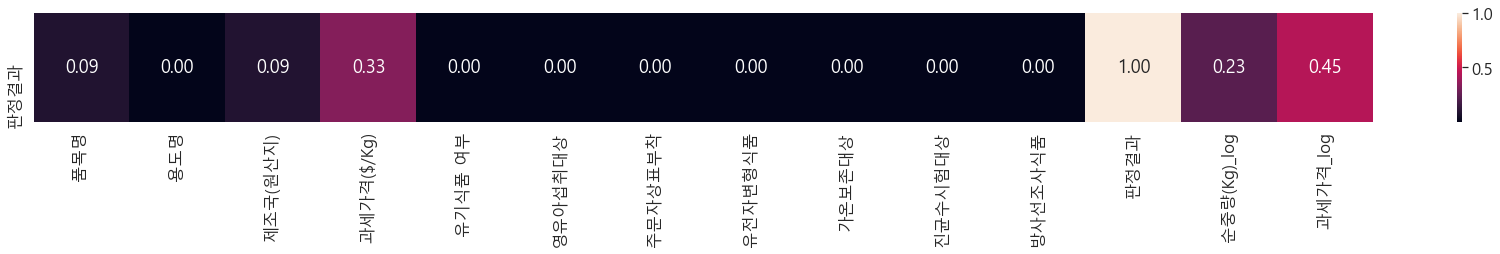

In [24]:
cat_corr(df_filtered)

Text(-0.35000000000000003, 379471.0, '379461')

Text(0.6500000000000001, 8814.0, '8804')

Text(1.6500000000000001, 909.0, '899')

Text(2.6499999999999995, 14.0, '4')

Text(3.6499999999999995, 70.0, '60')

Text(4.6499999999999995, 34.0, '24')

Text(5.6499999999999995, 42.0, '32')

Text(6.6499999999999995, 18.0, '8')

Text(7.6499999999999995, 12.0, '2')

Text(0.049999999999999975, 3932.0, '3922')

Text(1.0499999999999998, 99.0, '89')

Text(2.05, 10, '0')

Text(3.05, 10, '0')

Text(4.05, 10, '0')

Text(5.05, 10, '0')

Text(6.05, 10, '0')

Text(7.05, 10, '0')

Text(8.049999999999999, 10, '0')

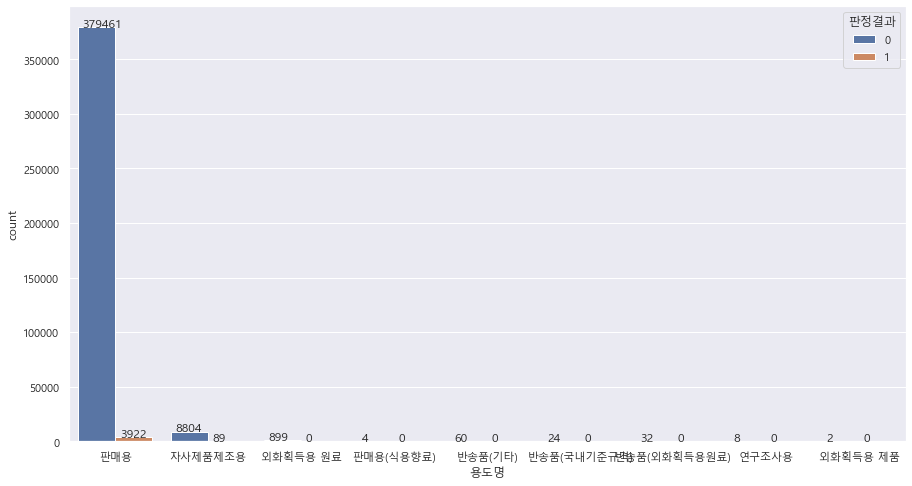

In [25]:
sns.set(rc={'figure.figsize':(15,8)})
plt.rcParams['font.family']='Malgun Gothic'
ax=sns.countplot(x='용도명',hue='판정결과',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

## step4. 국가

In [26]:
not_unfit_ever = df_filtered.groupby('제조국(원산지)')['판정결과'].mean()[df_filtered.groupby('제조국(원산지)')['판정결과'].mean() == 0].index
type(not_unfit_ever)
not_unfit_ever = list(not_unfit_ever)
'/'.join(not_unfit_ever)

pandas.core.indexes.base.Index

'가이아나/과테말라/기니/나미비아/나이지리아/니카라과/대한민국/라트비아/룩셈부르크/르완다/모나코/모로코/모리셔스/몰도바/몰타/바레인/바베이도스/벨라루스/벨리즈/보스니아 헤르체고비나/볼리비아/부탄/북마케도니아/북한/사이프러스/세네갈/세르비아/세이셸/수단/슬로베니아/아르메니아/아제르바이잔/알바니아/알제리/에스와티니/엘살바도르/오만/온두라스/우루과이/자메이카/잠비아/조지아/짐바브웨/쿠바/쿡 제도/탄자니아/통가/튀니지/트리니다드 토바고/파나마/파라과이/푸에르토리코'

In [27]:
df_filtered.shape
df_filtered = df_filtered[~df_filtered['제조국(원산지)'].isin(not_unfit_ever)]
df_filtered.shape

(368123, 14)

(366385, 14)

In [28]:
unfit= data['판정결과'].mean()*100
print(f'원래 데이터: {data.shape[0]}개, 부적합율: {unfit:.2f}%')
unfit= df_filtered['판정결과'].mean()*100
print(f'데이터 제거: {df_filtered.shape[0]}개, 부적합율: {unfit:.2f}%')

원래 데이터: 393305개, 부적합율: 1.02%
데이터 제거: 366385개, 부적합율: 1.08%


# 데이터 축소로 인한 예측 모형 개선 확인

## ML - prediction with pycaret

In [32]:
df.shape
df_filtered.shape
data1 = df.sample(frac=0.2).copy()
data2 = df_filtered.sample(frac=0.2).copy()
data1.shape
data2.shape

(393305, 14)

(366385, 14)

(78661, 14)

(73277, 14)

In [34]:
from pycaret.classification import *

## 1. original data & predict - data1

In [35]:
exp_name = setup(data = data1, silent=True,
                 target = '판정결과')

,Description,Value
0,session_id,2738
1,Target,판정결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(78661, 14)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,0


In [36]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9898,0.8354,0.0000,0.0000,0.0000,0.0000,0.0000,17.3633
ridge,Ridge Classifier,0.9898,0.0000,0.0036,0.5000,0.0071,0.0069,0.0412,0.3000
knn,K Neighbors Classifier,0.9897,0.5510,0.0000,0.0000,0.0000,-0.0001,-0.0008,15.5533
catboost,CatBoost Classifier,0.9897,0.8022,0.0107,0.4111,0.0208,0.0203,0.0644,4.0433
ada,Ada Boost Classifier,0.9896,0.8050,0.0018,0.1667,0.0035,0.0032,0.0160,2.2833
lightgbm,Light Gradient Boosting Machine,0.9896,0.8202,0.0053,0.1323,0.0102,0.0097,0.0250,0.7033
xgboost,Extreme Gradient Boosting,0.9895,0.8038,0.0018,0.0476,0.0034,0.0028,0.0074,7.4800
rf,Random Forest Classifier,0.9891,0.6995,0.0089,0.1116,0.0164,0.0148,0.0285,4.0933
svm,SVM - Linear Kernel,0.9884,0.0000,0.0107,0.0274,0.0154,0.0131,0.0139,0.6700
gbc,Gradient Boosting Classifier,0.9884,0.8168,0.0337,0.1653,0.0550,0.0519,0.0695,7.5933


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2738, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 2. downsized data & predict - data 2

In [37]:
exp_name = setup(data = data2, silent=True,
                 target = '판정결과')

,Description,Value
0,session_id,950
1,Target,판정결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(73277, 14)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,0


In [38]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9890,0.8405,0.0000,0.0000,0.0000,-0.0001,-0.0005,11.7600
knn,K Neighbors Classifier,0.9890,0.5672,0.0143,0.4901,0.0276,0.0270,0.0802,7.9000
ridge,Ridge Classifier,0.9890,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0005,0.2167
qda,Quadratic Discriminant Analysis,0.9890,0.4999,0.0000,0.0000,0.0000,-0.0002,-0.0011,1.1467
lightgbm,Light Gradient Boosting Machine,0.9890,0.8159,0.0196,0.4035,0.0374,0.0364,0.0867,0.4100
catboost,CatBoost Classifier,0.9890,0.8035,0.0357,0.4917,0.0661,0.0647,0.1284,3.4900
xgboost,Extreme Gradient Boosting,0.9889,0.8129,0.0143,0.4087,0.0273,0.0265,0.0722,4.3167
ada,Ada Boost Classifier,0.9888,0.8052,0.0018,0.0833,0.0035,0.0029,0.0104,1.4533
rf,Random Forest Classifier,0.9886,0.7221,0.0410,0.3196,0.0720,0.0697,0.1097,2.8833
gbc,Gradient Boosting Classifier,0.9872,0.8211,0.0197,0.0884,0.0317,0.0280,0.0363,4.7667


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=950, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 3. A little feature engineering & predict with downsized data

In [46]:
exp_name = setup(data = data2, 
                 silent=True,
                 normalize = True,
                 group_features = ['순중량(Kg)_log', '과세가격_log'],
                 high_cardinality_features = ['품목명', '제조국(원산지)'],
                 feature_interaction = True, 
                 feature_ratio = True,
                 polynomial_features = True,
                 bin_numeric_features = ['순중량(Kg)_log', '과세가격_log'],
                 combine_rare_levels = True,
                 target = '판정결과')

,Description,Value
0,session_id,3314
1,Target,판정결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(73277, 14)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,1


In [47]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9890,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1433
lr,Logistic Regression,0.9889,0.7956,0.0000,0.0000,0.0000,-0.0003,-0.0012,6.9367
ada,Ada Boost Classifier,0.9889,0.8041,0.0000,0.0000,0.0000,-0.0001,-0.0005,3.3267
knn,K Neighbors Classifier,0.9888,0.5571,0.0018,0.0370,0.0034,0.0030,0.0070,2.4933
xgboost,Extreme Gradient Boosting,0.9888,0.7998,0.0195,0.3889,0.0368,0.0356,0.0829,4.7267
catboost,CatBoost Classifier,0.9888,0.8103,0.0089,0.2593,0.0171,0.0164,0.0460,8.3300
rf,Random Forest Classifier,0.9886,0.7411,0.0230,0.2875,0.0426,0.0409,0.0783,1.7933
lightgbm,Light Gradient Boosting Machine,0.9883,0.8125,0.0160,0.1703,0.0292,0.0273,0.0490,0.9300
gbc,Gradient Boosting Classifier,0.9875,0.8171,0.0106,0.0728,0.0186,0.0156,0.0236,12.6967
et,Extra Trees Classifier,0.9866,0.7061,0.0390,0.1339,0.0601,0.0554,0.0666,1.6900


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3314,
                solver='auto', tol=0.001)

## 4. SMOTE with clusters, with removing outlier

In [48]:
exp_name = setup(data = data2, 
                 silent=True,
                 normalize = True,
                 group_features = ['순중량(Kg)_log', '과세가격_log'],
                 feature_interaction = True, 
                 feature_ratio = True,
                 polynomial_features = True,
                 bin_numeric_features = ['순중량(Kg)_log', '과세가격_log'],
                 combine_rare_levels = True,
                 
                 create_clusters = True,
                 remove_outliers = True,
                 fix_imbalance = True, 
                 
                 target = '판정결과')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:43:34
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


KeyboardInterrupt: 

In [42]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9892,0.4999,0.0000,0.0000,0.0000,-0.0005,-0.0013,1.7300
xgboost,Extreme Gradient Boosting,0.9880,0.7996,0.0238,0.1119,0.0392,0.0362,0.0475,29.9867
catboost,CatBoost Classifier,0.9877,0.8007,0.0119,0.0556,0.0196,0.0163,0.0212,100.8700
lightgbm,Light Gradient Boosting Machine,0.9875,0.8101,0.0179,0.0837,0.0294,0.0258,0.0340,3.5300
rf,Random Forest Classifier,0.9858,0.7376,0.0298,0.0748,0.0425,0.0367,0.0407,5.5567
et,Extra Trees Classifier,0.9850,0.7127,0.0357,0.0713,0.0475,0.0409,0.0433,3.3567
gbc,Gradient Boosting Classifier,0.9811,0.7961,0.1012,0.0917,0.0936,0.0845,0.0857,43.2933
dt,Decision Tree Classifier,0.9770,0.5348,0.0833,0.0604,0.0698,0.0585,0.0594,7.4833
ada,Ada Boost Classifier,0.9558,0.7773,0.1845,0.0523,0.0814,0.0660,0.0802,11.6567
knn,K Neighbors Classifier,0.9025,0.5764,0.1964,0.0230,0.0411,0.0226,0.0381,6.6833


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

## 5. SMOTE with clusters, with removing outlier  with 2. data

In [50]:
exp_name = setup(data = data2, silent=True,
                 bin_numeric_features = ['순중량(Kg)_log', '과세가격_log'],
                 fix_imbalance = True,
                 target = '판정결과')

,Description,Value
0,session_id,8320
1,Target,판정결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(73277, 14)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,0
9,High Cardinality Features,0


In [51]:
compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9870,0.7138,0.0425,0.1325,0.0644,0.0596,0.0696,6.7367
catboost,CatBoost Classifier,0.9863,0.8139,0.0407,0.1198,0.0573,0.0521,0.0611,21.9933
et,Extra Trees Classifier,0.9859,0.7188,0.0536,0.1215,0.0744,0.0684,0.0743,13.3400
xgboost,Extreme Gradient Boosting,0.9855,0.8028,0.0296,0.0863,0.0408,0.0350,0.0416,9.7700
lightgbm,Light Gradient Boosting Machine,0.9850,0.8148,0.0462,0.0967,0.0604,0.0538,0.0585,1.8700
dt,Decision Tree Classifier,0.9804,0.5397,0.0888,0.0882,0.0883,0.0784,0.0785,2.3867
gbc,Gradient Boosting Classifier,0.9398,0.8022,0.2809,0.0536,0.0900,0.0736,0.1018,12.7167
svm,SVM - Linear Kernel,0.8874,0.0000,0.3857,0.0589,0.0595,0.0458,0.0904,1.0267
knn,K Neighbors Classifier,0.8825,0.6304,0.3235,0.0300,0.0550,0.0364,0.0683,55.6233
ada,Ada Boost Classifier,0.8702,0.7907,0.4472,0.0366,0.0676,0.0491,0.0980,3.4300


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8320, verbose=0,
                       warm_start=False)

In [55]:
model = create_model('lr', fold=5)
tuned_model = tune_model(model, fold=5)
tuned_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8069,0.8087,0.6111,0.0329,0.0625,0.0434,0.1081
1,0.7989,0.8206,0.6481,0.0334,0.0635,0.0444,0.1136
2,0.8015,0.8020,0.6789,0.0357,0.0678,0.0486,0.1230
3,0.8062,0.7973,0.6204,0.0333,0.0631,0.0440,0.1101
4,0.8062,0.8037,0.6852,0.0365,0.0693,0.0503,0.1263
Mean,0.8039,0.8065,0.6487,0.0343,0.0652,0.0461,0.1162
SD,0.0032,0.0080,0.0299,0.0014,0.0027,0.0028,0.0072


<function pycaret.classification.tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Union[str, NoneType] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = False, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, **kwargs) -> Any>

In [57]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# End

In [60]:
 error linie

SyntaxError: invalid syntax (<ipython-input-60-950062d54aee>, line 1)

In [61]:
df_filtered.to_pickle('../../pkl/df_filtered-01.pkl')

### 전체 데이터 확인

In [19]:
df = pd.read_pickle('../../pkl/total-import-food-16-21.pkl').sample(frac=0.2, random_state=11)

In [25]:
import glob
glob.glob('../../pkl/*import-food-16-21.pkl')

['../../pkl\\total-import-food-16-21.pkl',
 '../../pkl\\가공식품-import-food-16-21.pkl',
 '../../pkl\\건강기능식품-import-food-16-21.pkl',
 '../../pkl\\기구또는용기.포장-import-food-16-21.pkl',
 '../../pkl\\농.임산물-import-food-16-21.pkl',
 '../../pkl\\수산물-import-food-16-21.pkl',
 '../../pkl\\식품첨가물-import-food-16-21.pkl',
 '../../pkl\\축산물-import-food-16-21.pkl']

In [45]:
selections = '../../working/selection.xlsx'
with pd.ExcelWriter(selections) as writer:
    for col in df['제품구분'].unique():
        tf = summary(df[df['제품구분'] == col])
        tf.head(2)
        tf.to_excel(writer, sheet_name = col) #raw_data1 시트에 저장

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,8272,['201900227496' 202100318756 '201700401795' '2...
제품구분,object,0,0.0,1,['건강기능식품']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,128243,['201600291236' 202100501207 '201700260680' '2...
제품구분,object,0,0.0,1,['가공식품']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,27230,['201800249865' '201900475995' '201700316913' ...
제품구분,object,0,0.0,1,['농.임산물']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,44978,['201900594489' '201600558486' '202000154296' ...
제품구분,object,0,0.0,1,['수산물']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,12275,[202100148103 '20160070534' '201800267182' 202...
제품구분,object,0,0.0,1,['식품첨가물']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,14280,['IFC018080414' 202000366315 202000691851 'IFD...
제품구분,object,0,0.0,1,['축산물']


,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(contents)
접수번호,object,0,0.0,16562,['201800073820' '20160140528' '201900534887' '...
제품구분,object,0,0.0,1,['기구또는용기.포장']


In [47]:
df_filtered.head()
df_filtered.shape

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log
1,서류가공품,판매용,캐나다,1.238,아니오,아니오,아니오,해당없음,N,N,N,0,9.875088,10.088854
2,청주,판매용,일본,3.636,아니오,아니오,아니오,해당없음,N,N,N,0,10.162770,11.453674
3,소스류,판매용,중국,2.004,아니오,아니오,아니오,표시하지않음,N,N,N,0,7.321189,8.016318
4,과실주,판매용,프랑스,5.733,아니오,아니오,아니오,해당없음,N,N,N,0,5.192957,6.939254
5,만두류,판매용,중국,4.540,아니오,아니오,아니오,해당없음,N,N,N,0,7.677864,9.190852


(366061, 14)

In [51]:
path = r'D:\smart food\data'

df_filtered.to_pickle(path+'/df_0524.pkl')